# Compounding

## **1. Function**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def compound_growth(
    currency: str,
    initial_investment: float,
    annual_rate: float,
    inflow: float = 0,
    years: float = 0,
    periods_per_year: int = 12
):
    # --- Initial Calculations ---
    total_periods = years * periods_per_year
    period_rate = annual_rate / periods_per_year
    starting_balance = initial_investment
    ending_balance = 0
    cumulated_interest=0
    results = []

    for period in range(total_periods):
        time = period / periods_per_year
        initial_investment2 =0
        ending_balance = round(starting_balance * (1 + period_rate),2)
        period_interest = round(ending_balance-starting_balance,2)
        cumulated_interest = cumulated_interest + period_interest
        results.append((time, inflow,starting_balance,period_interest,ending_balance,cumulated_interest))
        starting_balance = round(ending_balance+ inflow + initial_investment2,2)

    df = pd.DataFrame(results, columns=["Year","Inflow", "Starting_Balance","Interest", "Ending_Balance","P&L"])
    df["Inflow"].iloc[0]=0
    df.index = range(1, len(df) + 1) # df starts with index = 1 instead of 0

    # --- Summary Calculations ---
    final_balance = df["Ending_Balance"].iloc[-1]
    total_invested = initial_investment + inflow * (total_periods-1)
    total_interest = (final_balance - total_invested)

    # --- Print Summary ---
    print("📊 Compound Interest Summary")
    print(f"Initial Investment : {initial_investment:,.2f} {currency}")
    print(f"Periodic Inflow    : {inflow:,.2f} {currency} every {12 // periods_per_year} months")
    print(f"Annual Rate        : {annual_rate * 100:.2f}%")
    print(f"Total Years        : {years}")
    print(f"Total Invested     : {total_invested:,.2f} {currency}")
    print(f"Total Interest     : {total_interest:,.2f} {currency}")
    print(" ")
    print(f"Final Balance      : {final_balance:,.2f} {currency}")
    print(" ")

    # --- Plot ---
    plt.figure(figsize=(10, 5))
    plt.plot(df["Year"], df["Ending_Balance"], label="Investment Growth")
    plt.title("Compound Interest Growth Over Time")
    plt.xlabel("Years")
    plt.ylabel(f"Portfolio Value ({currency})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df

📊 Compound Interest Summary
Initial Investment : 5,000.00 CHF
Periodic Inflow    : 1,000.00 CHF every 1 months
Annual Rate        : 10.00%
Total Years        : 5
Total Invested     : 64,000.00 CHF
Total Interest     : 20,663.62 CHF
 
Final Balance      : 84,663.62 CHF
 
        Year  Inflow  Starting_Balance  Interest  Ending_Balance       P&L
48  3.916667    1000          64630.67    538.59        65169.26  13169.26
49  4.000000    1000          66169.26    551.41        66720.67  13720.67
50  4.083333    1000          67720.67    564.34        68285.01  14285.01
51  4.166667    1000          69285.01    577.38        69862.39  14862.39
52  4.250000    1000          70862.39    590.52        71452.91  15452.91
53  4.333333    1000          72452.91    603.77        73056.68  16056.68
54  4.416667    1000          74056.68    617.14        74673.82  16673.82
55  4.500000    1000          75673.82    630.62        76304.44  17304.44
56  4.583333    1000          77304.44    644.20      

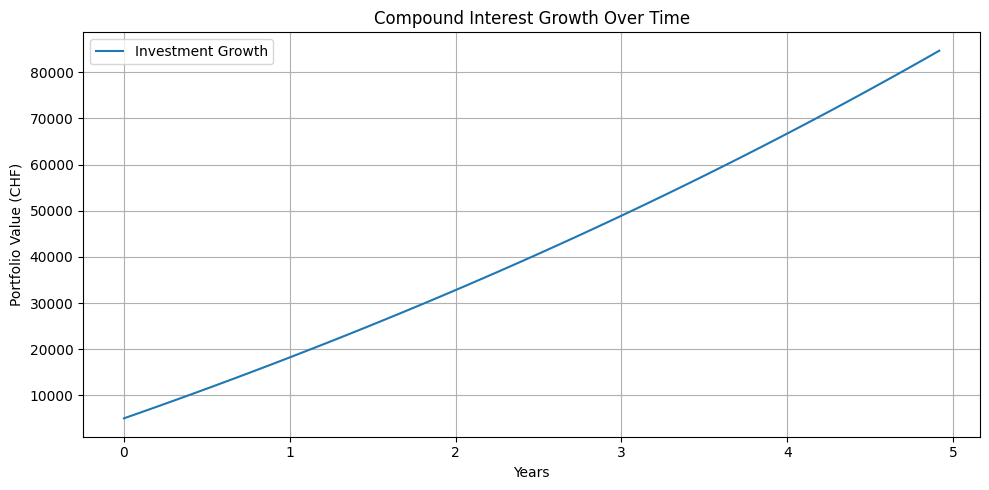

In [2]:
df = compound_growth(
    currency="CHF",
    initial_investment=5000,
    annual_rate=0.10, #Annual rate of return
    inflow=1000, # Per period
    years=5,
    periods_per_year= 12 #Daily = 360 / Monthly = 12 / Annually = 1
)

print(df.tail(13))